In [1]:
# sources
# https://www.dati.lombardia.it/Ambiente/Dati-sensori-aria-2020/88sp-5tmj
# https://www.dati.lombardia.it/Ambiente/Stazioni-qualit-dell-aria/ib47-atvt

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import Markdown

In [2]:
df = pd.read_csv('2020.csv', parse_dates=['Data'])

In [3]:
sn = pd.read_csv('stazioni.csv')

In [4]:
DF = df.merge(
    sn,
    on='IdSensore'
)

In [5]:
def convert_to_µg_m3(row):
    unit = row.UnitaMisura
    value = row.Valore
    if unit == 'µg/m³':
        return value
    if unit == 'mg/m³':
        return value * 1e3
    if unit == 'ng/m³':
        return value / 1e3

In [6]:
DF.loc[DF.Valore<0, 'Valore'] = np.nan

In [7]:
DF.dropna(subset=['Valore'], inplace=True)

In [8]:
DF['µg_m3'] = DF.apply(convert_to_µg_m3, axis=1)

In [9]:
sensori = {
    'Ammoniaca': 'ammonia',
    'Arsenico': 'arsenic',
    'Benzene': 'benzene',
    'Benzo(a)pirene': 'benzoapirene',
    'Biossido di Azoto': 'NO2',
    'Biossido di Zolfo': 'SO2',
    'BlackCarbon': 'bc',
    'Cadmio': 'Cd',
    'Monossido di Azoto': 'NO',
    'Monossido di Carbonio': 'CO',
    'Nikel': 'Ni',
    'Ossidi di Azoto': 'NOx',
    'Ozono': 'O3',
    'PM10 (SM2005)': 'PM10',
    'Particelle sospese PM2.5': 'PM25',
    'Piombo': 'Pb',
}

In [10]:
DF['sensor'] = DF.NomeTipoSensore.map(sensori)

In [11]:
province = {
    'BG': 'Bergamo', 
    'BS': 'Brescia', 
    'CO': 'Como', 
    'CR': 'Cremona', 
    'LC': 'Lecco', 
    'LO': 'Lodi', 
    'MB': 'Monza e della Brianza', 
    'MI': 'Milano', 
    'MN': 'Mantova', 
    'PV': 'Pavia', 
    'SO': 'Sondrio', 
    'VA': 'Varese',
}

In [12]:
DF['province'] = DF.Provincia.map(province)

In [13]:
DF['date'] = DF.Data.dt.normalize()

In [14]:
df_trend = None
for s in tqdm(DF.NomeStazione.unique()):
    _df = DF[DF.NomeStazione==s]
    for p in tqdm(_df.sensor.unique(), leave=False):
        __df = _df[_df.sensor==p].groupby('date').median()
        try:
            sea = sm.tsa.seasonal_decompose(__df['µg_m3'], period=30, model='additive')
            _trend = pd.DataFrame(sea.trend).reset_index()
            _trend.columns = ['date', 'µg_m3']
            _trend['NomeStazione'] = s
            _trend['sensor'] = p
            _trend['province'] = _df.province.unique()[0]

            if df_trend is None:
                df_trend = _trend
            else:
                df_trend = df_trend.append(_trend, ignore_index=True)
        except Exception as err:
            print(s, f"`p` ->", err)

Meda `p` -> x must have 2 complete cycles requires 60 observations. x only has 21 observation(s)
Meda `p` -> x must have 2 complete cycles requires 60 observations. x only has 26 observation(s)
Meda `p` -> x must have 2 complete cycles requires 60 observations. x only has 26 observation(s)
Meda `p` -> x must have 2 complete cycles requires 60 observations. x only has 26 observation(s)
Meda `p` -> x must have 2 complete cycles requires 60 observations. x only has 26 observation(s)


Magenta `p` -> x must have 2 complete cycles requires 60 observations. x only has 22 observation(s)
Magenta `p` -> x must have 2 complete cycles requires 60 observations. x only has 28 observation(s)
Magenta `p` -> x must have 2 complete cycles requires 60 observations. x only has 28 observation(s)
Magenta `p` -> x must have 2 complete cycles requires 60 observations. x only has 28 observation(s)
Magenta `p` -> x must have 2 complete cycles requires 60 observations. x only has 28 observation(s)


Milano - via Senato `p` -> x must have 2 complete cycles requires 60 observations. x only has 1 observation(s)
Milano - via Senato `p` -> x must have 2 complete cycles requires 60 observations. x only has 53 observation(s)
Milano - via Senato `p` -> x must have 2 complete cycles requires 60 observations. x only has 35 observation(s)
Milano - via Senato `p` -> x must have 2 complete cycles requires 60 observations. x only has 35 observation(s)
Milano - via Senato `p` -> x must have 2 complete cycles requires 60 observations. x only has 35 observation(s)
Milano - via Senato `p` -> x must have 2 complete cycles requires 60 observations. x only has 35 observation(s)


Varese - via Copelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 15 observation(s)
Varese - via Copelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 15 observation(s)
Varese - via Copelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 15 observation(s)
Varese - via Copelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 15 observation(s)


Bergamo - via Meucci `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Bergamo - via Meucci `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Bergamo - via Meucci `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Bergamo - via Meucci `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)


Soresina `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)
Soresina `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)
Soresina `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)
Soresina `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)


Brescia - Villaggio Sereno `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)
Brescia - Villaggio Sereno `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)
Brescia - Villaggio Sereno `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)
Brescia - Villaggio Sereno `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)


Mantova - S.Agnese `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Mantova - S.Agnese `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Mantova - S.Agnese `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Mantova - S.Agnese `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)


Casirate d`Adda `p` -> x must have 2 complete cycles requires 60 observations. x only has 31 observation(s)
Casirate d`Adda `p` -> x must have 2 complete cycles requires 60 observations. x only has 31 observation(s)
Casirate d`Adda `p` -> x must have 2 complete cycles requires 60 observations. x only has 31 observation(s)
Casirate d`Adda `p` -> x must have 2 complete cycles requires 60 observations. x only has 31 observation(s)


Moggio `p` -> x must have 2 complete cycles requires 60 observations. x only has 33 observation(s)
Moggio `p` -> x must have 2 complete cycles requires 60 observations. x only has 33 observation(s)
Moggio `p` -> x must have 2 complete cycles requires 60 observations. x only has 33 observation(s)
Moggio `p` -> x must have 2 complete cycles requires 60 observations. x only has 33 observation(s)


Schivenoglia `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)
Schivenoglia `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)
Schivenoglia `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)
Schivenoglia `p` -> x must have 2 complete cycles requires 60 observations. x only has 32 observation(s)


Darfo (aria) `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)
Darfo (aria) `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)
Darfo (aria) `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)
Darfo (aria) `p` -> x must have 2 complete cycles requires 60 observations. x only has 37 observation(s)


Milano - Pascal Città Studi `p` -> x must have 2 complete cycles requires 60 observations. x only has 27 observation(s)
Milano - Pascal Città Studi `p` -> x must have 2 complete cycles requires 60 observations. x only has 27 observation(s)
Milano - Pascal Città Studi `p` -> x must have 2 complete cycles requires 60 observations. x only has 27 observation(s)
Milano - Pascal Città Studi `p` -> x must have 2 complete cycles requires 60 observations. x only has 27 observation(s)
Milano - Pascal Città Studi `p` -> x must have 2 complete cycles requires 60 observations. x only has 51 observation(s)


Sondrio - via Paribelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Sondrio - via Paribelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Sondrio - via Paribelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)
Sondrio - via Paribelli `p` -> x must have 2 complete cycles requires 60 observations. x only has 36 observation(s)


In [15]:
df_group = df_trend.groupby(['province', 'sensor', 'date'])[['µg_m3']].median().reset_index()

In [16]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37652 entries, 0 to 37651
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   province  37652 non-null  object        
 1   sensor    37652 non-null  object        
 2   date      37652 non-null  datetime64[ns]
 3   µg_m3     34351 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ MB


In [17]:
aqi = df_group.pivot(index=['province', 'date'], columns='sensor', values='µg_m3').reset_index()

In [18]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   province      4392 non-null   object        
 1   date          4392 non-null   datetime64[ns]
 2   CO            4032 non-null   float64       
 3   NO            325 non-null    float64       
 4   NO2           4032 non-null   float64       
 5   NOx           4032 non-null   float64       
 6   O3            4032 non-null   float64       
 7   PM10          4026 non-null   float64       
 8   PM25          3963 non-null   float64       
 9   SO2           4000 non-null   float64       
 10  ammonia       1921 non-null   float64       
 11  bc            314 non-null    float64       
 12  benzene       3271 non-null   float64       
 13  benzoapirene  403 non-null    float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 480.5+ KB


In [22]:
AQI = aqi[
    ['province', 'date',
    'CO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25']
].copy(deep=True)

# Bergamo

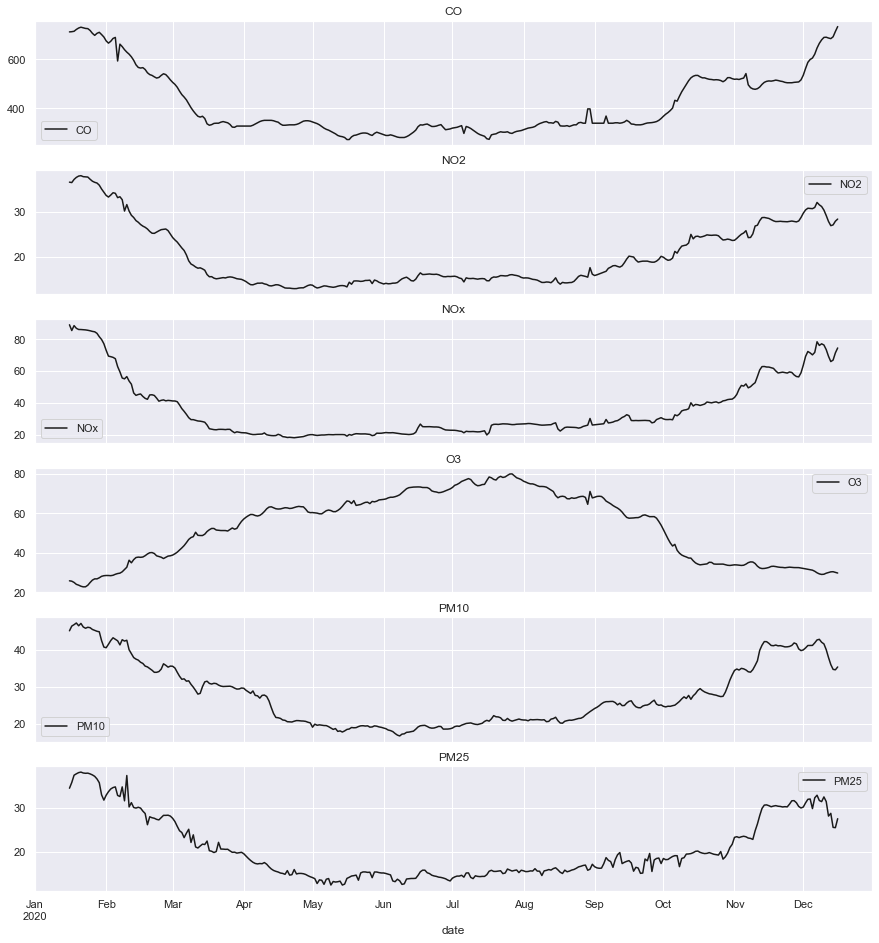

# Brescia

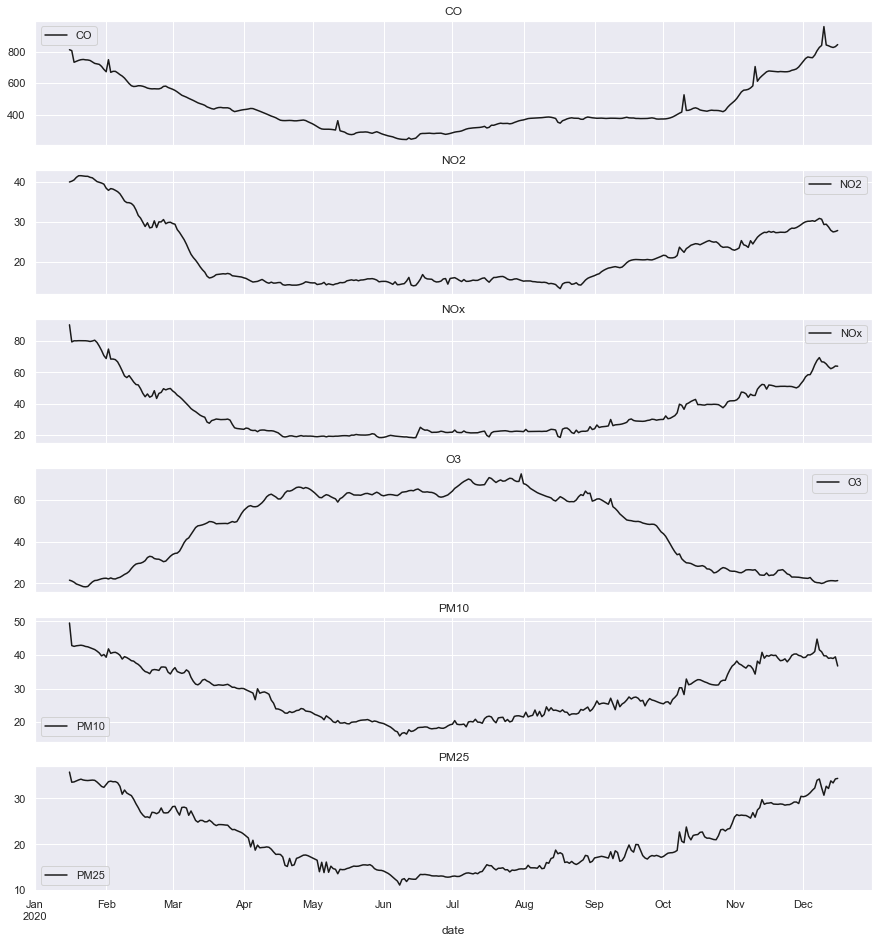

# Como

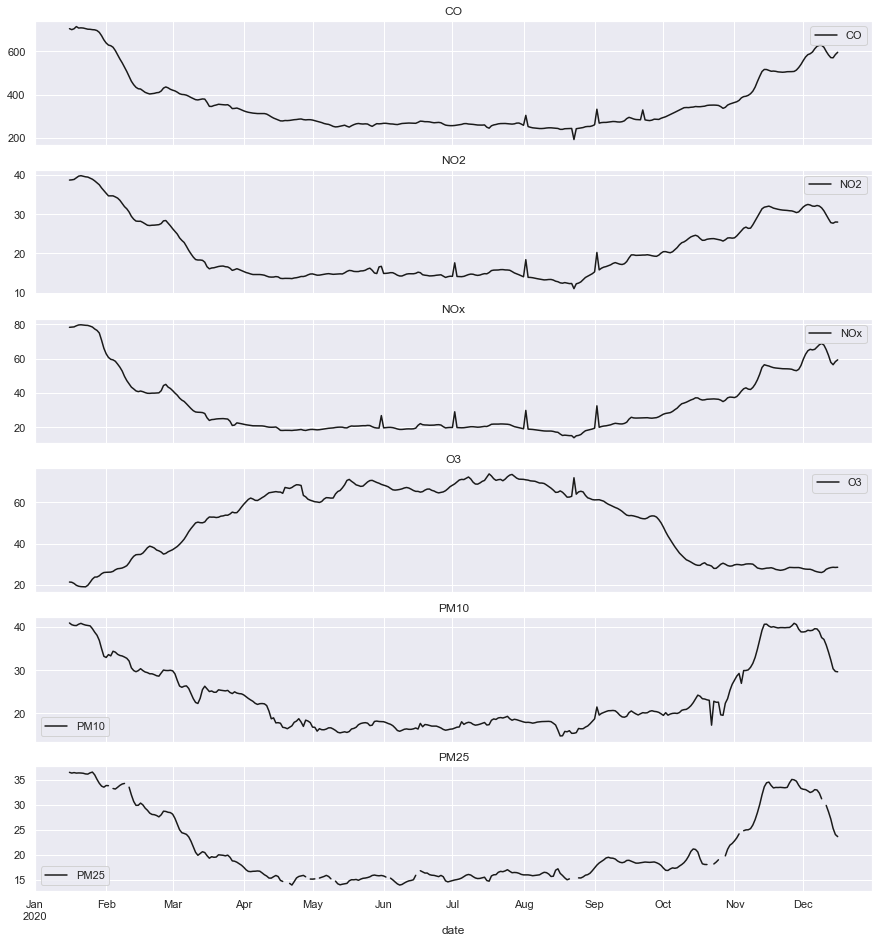

# Cremona

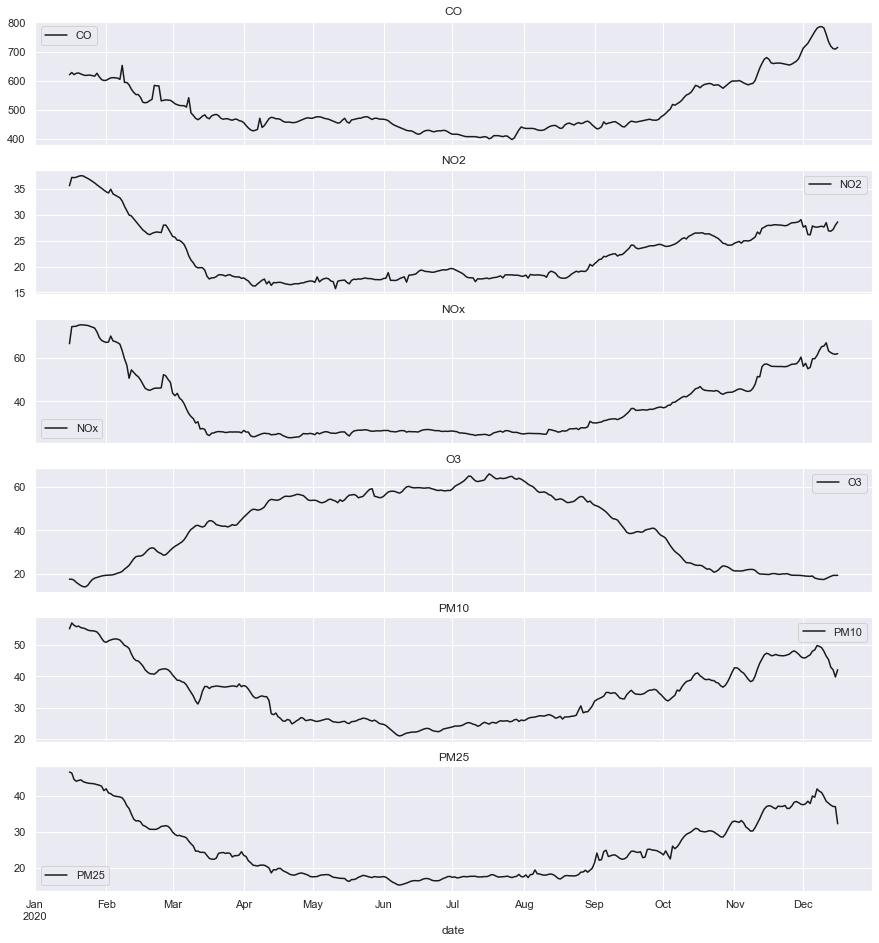

# Lecco

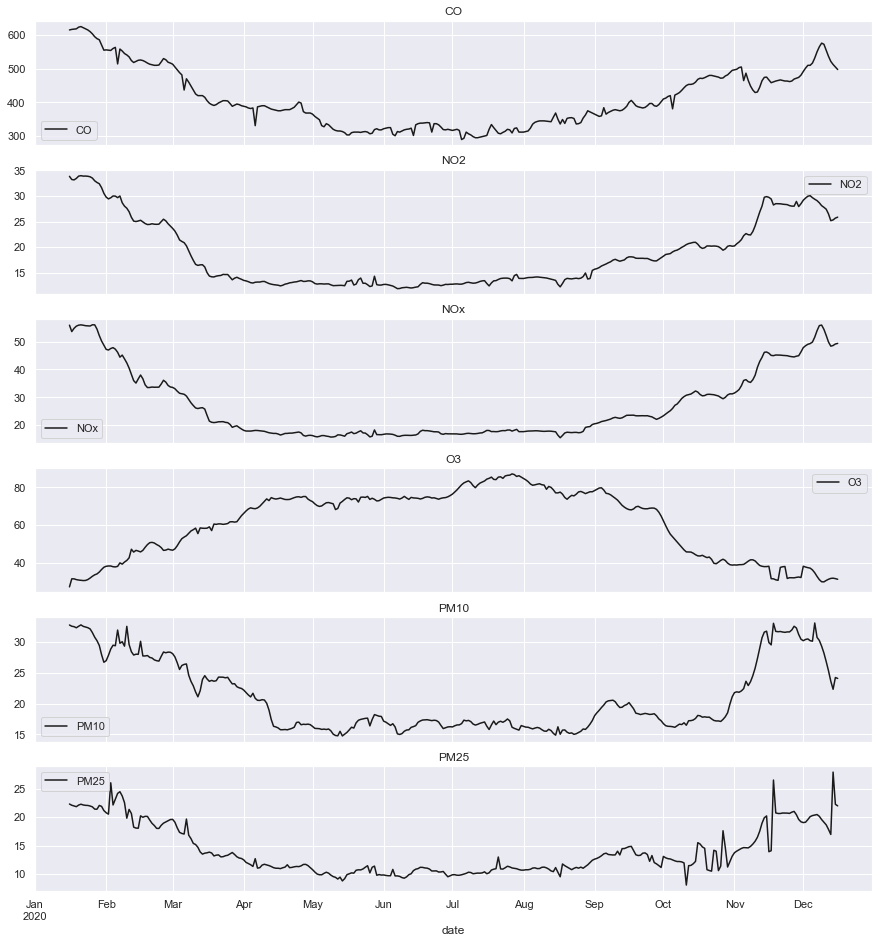

# Lodi

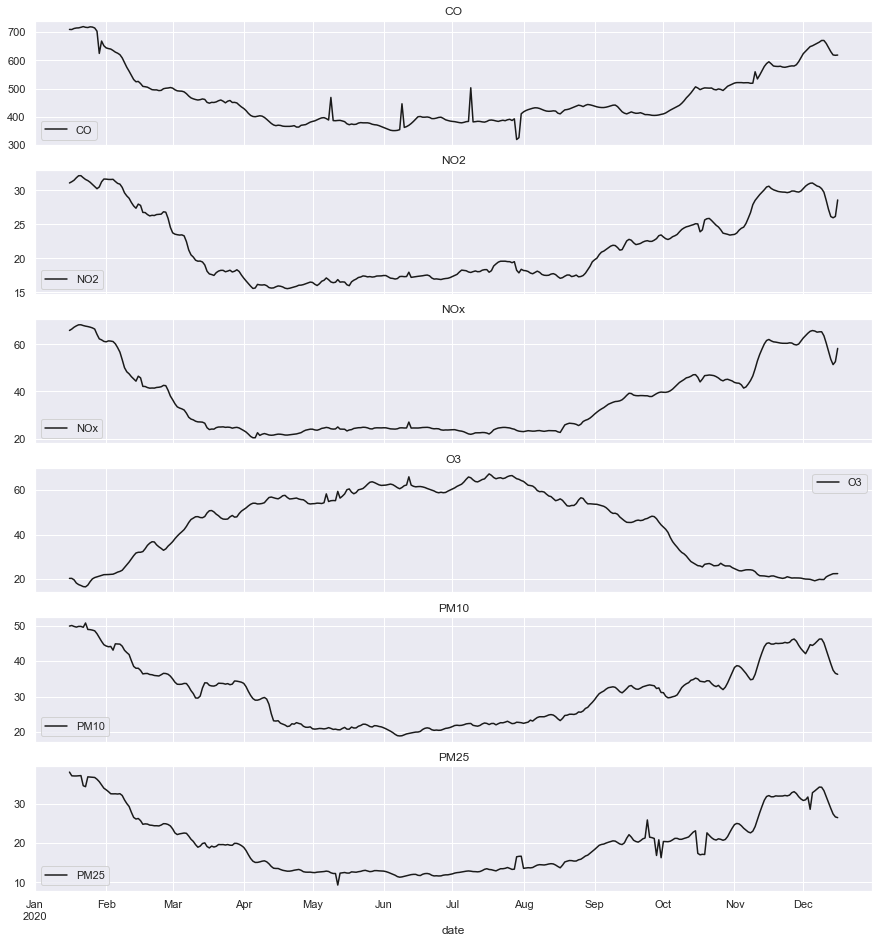

# Mantova

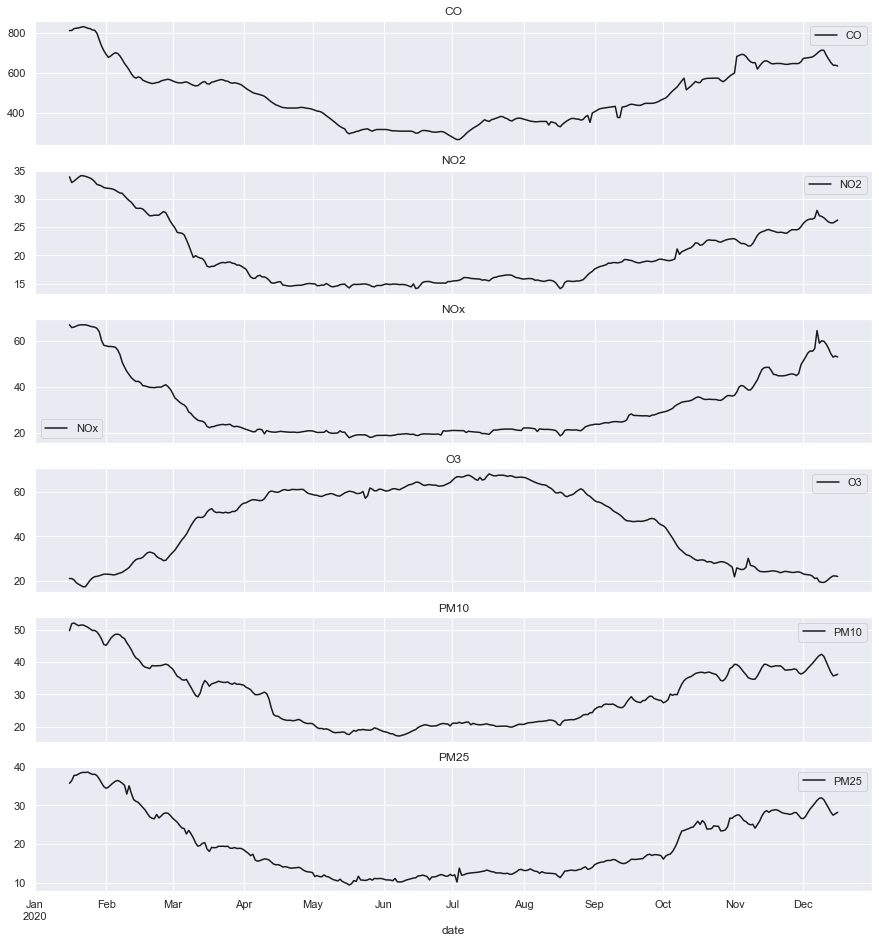

# Milano

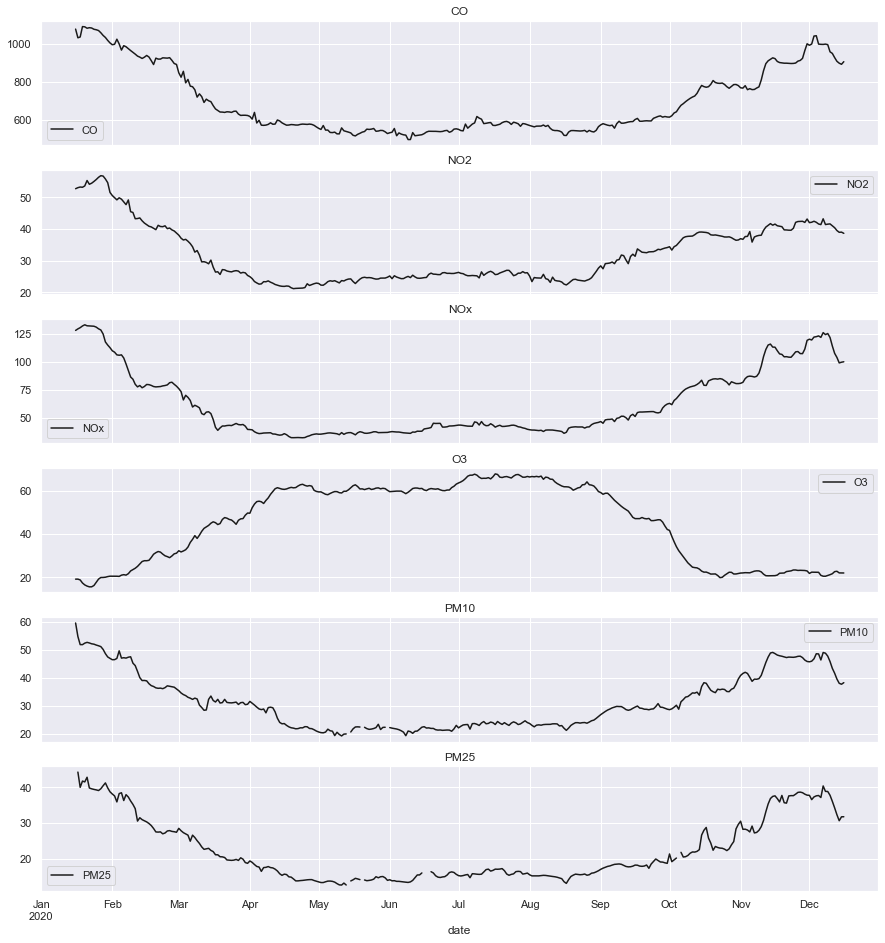

# Monza e della Brianza

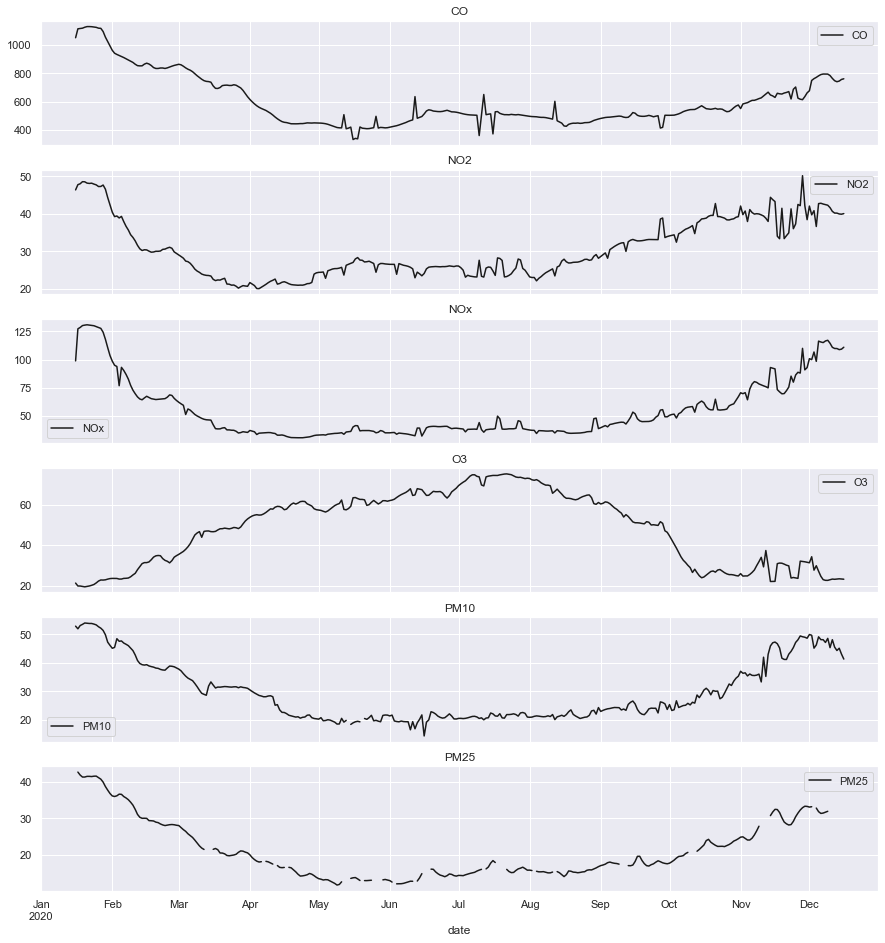

# Pavia

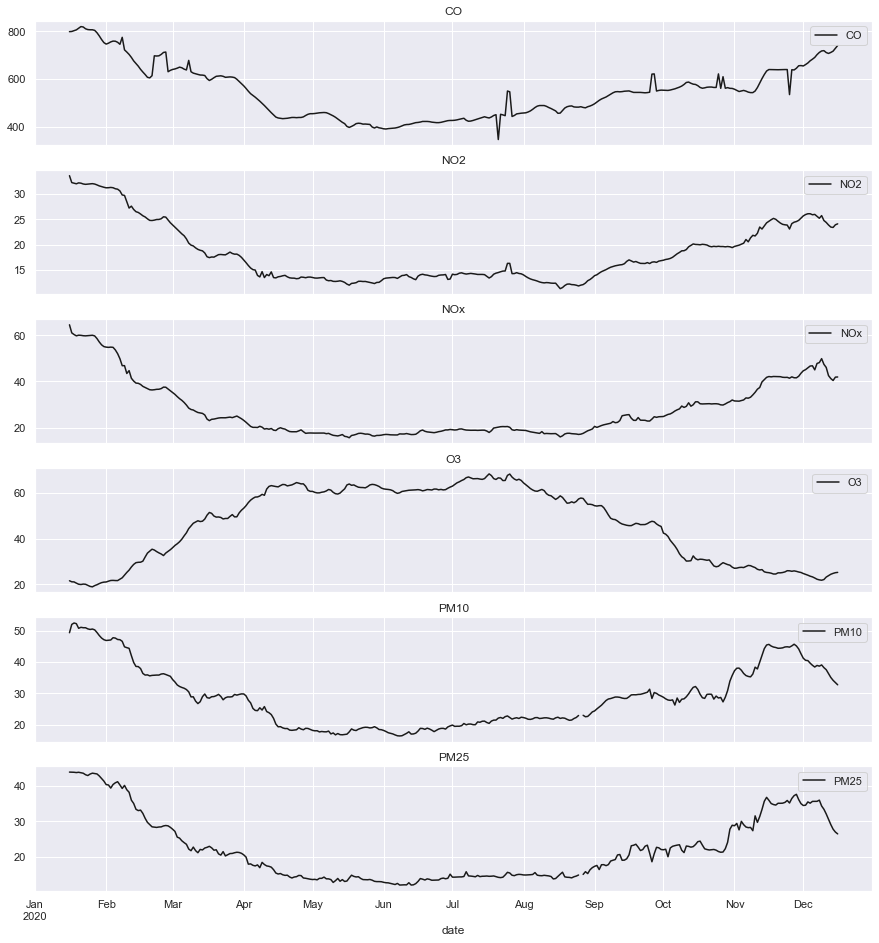

# Sondrio

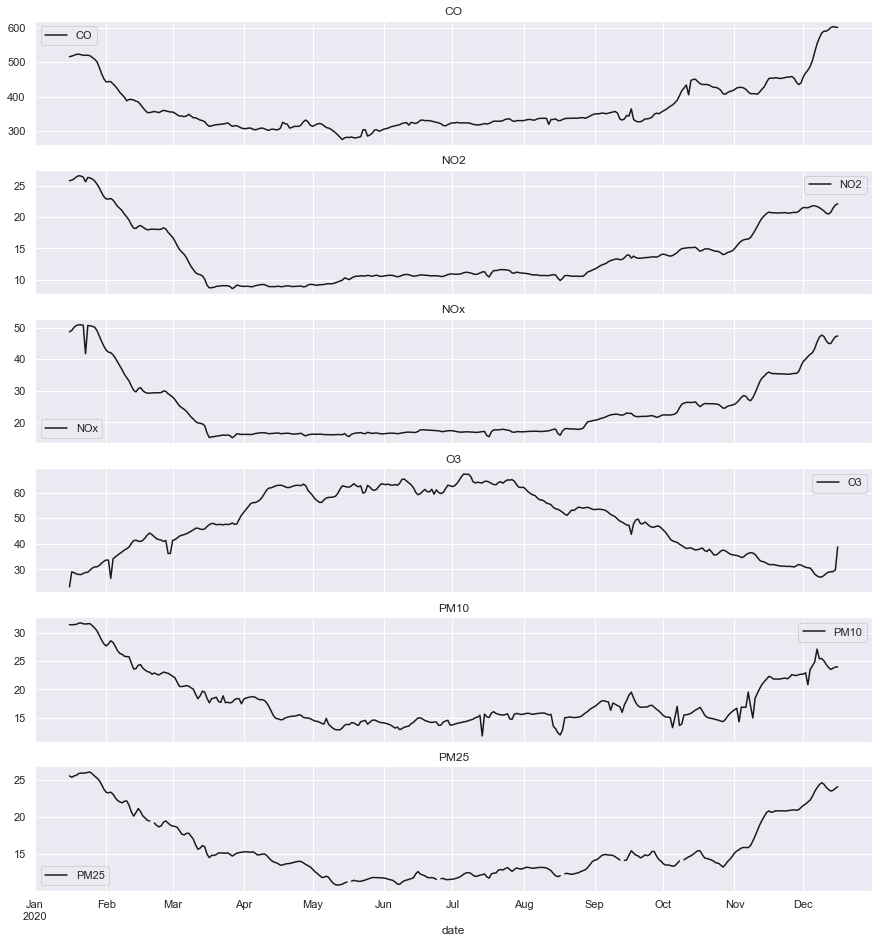

# Varese

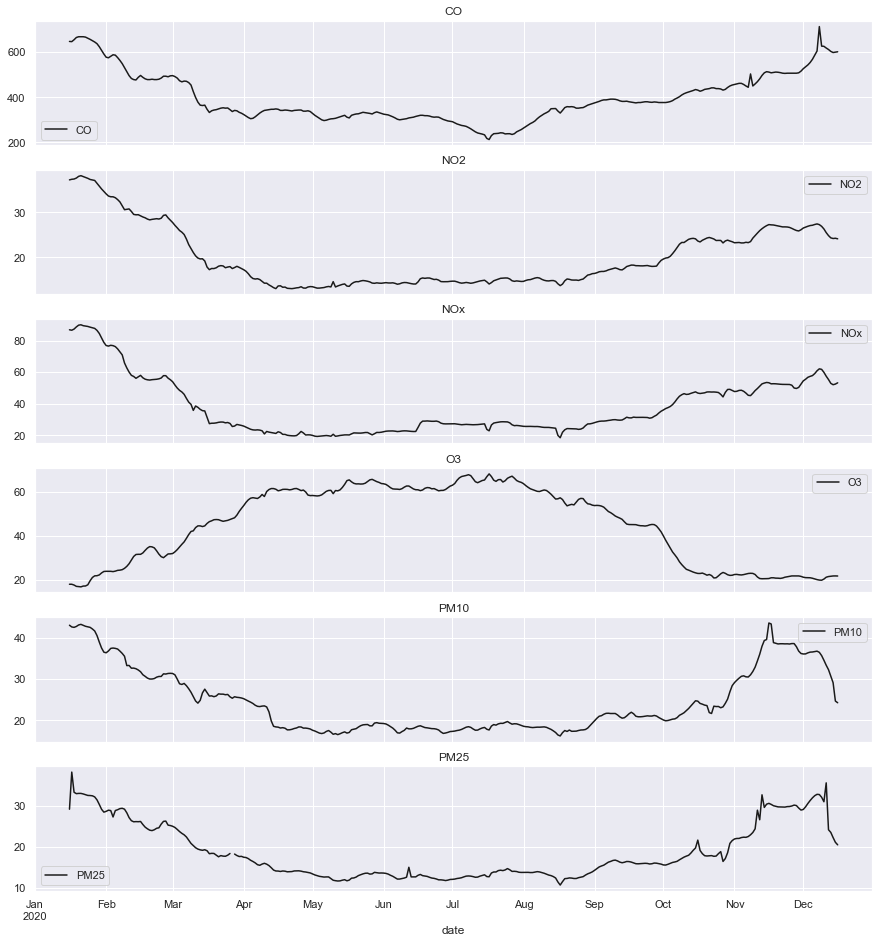

In [24]:
X = ['CO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25']
for pr in sorted(AQI.province.unique()):
    display(Markdown(f"# {pr}"))
    _df = AQI[AQI.province==pr]
    fig, ax = plt.subplots(6, 1, figsize=(15, 2*8), sharex=True)
    for i, x in enumerate(X):
        _df.plot(x='date', y=x, ax=ax[i], color='k')
        ax[i].set(
            title=x
        )
    plt.show()

In [25]:
AQI.to_csv('aqi.csv', index=False)